# Project: Creditworthiness (Part1)

### by Sooyeon Won
### Keywords
- Analytical Framework
- Predictive Classification Models (Logistic Regression, Decision Tree, Random Forest, Boosted Model) 
- Model Training and Validation 
- Model Comparison 

## Table of Contents
<ul>
<li><a href="#Intro">Introduction (Part1)</a></li>
<li><a href="#Preparation">Data Preparation (Part1)</a></li>
<li><a href="#Exploration">Data Exploration (Part1)</a></li>
<li><a href="#Analysis">Data Analysis (Part2)</a></li>
<li><a href="#Conclusion">Conclusion (Part2)</a></li>
</ul>

<a id='Intro'></a>
## Introduction

It is the project of **Classification Models** from [Predictive Analytics for Business Nanodegree in Udacity](https://www.udacity.com/course/predictive-analytics-for-business-nanodegree--nd008). Classification algorithms are used to predict the probability of a categorical dependent variable(a.k.a. target variable). It is a powerful tool for business analysis. For this project, I approached the business issues using binary and non-binary classification models such as **Logistic Regression, Decision Tree, Random Forest, Boosted Model**. Based on the model comparisons, I investigate the optimal business insights. The business problem is as follows. 

> At a small bank, I am tasked with determining if customers are creditworthy to give a loan to. Typically, my team gets 200 loan applications per week and approves them by hand. Due to a financial scandal that hit a competitive bank last week, the team suddenly have an influx of new people applying for loans for your bank instead of the other bank in your city. All of a sudden the team has nearly 500 loan applications to process this week. My task is to systematically evaluate the creditworthiness of these new loan applicants using classification modelling. <br>
For this project, I analyse the business problem using the Problem Solving Framework and provide a list of creditworthy customers to the manager. The provided dataset contains the following information to work with:<br>
- Data on all past applications
- The list of customers that need to be processed in the next few days 


The analysis is separated into three parts. 
1. The first part of the analysis (Filename: 01_Creditworthiness_Data_Cleaning_Exploration.ipynb) contains the process of **Data Cleaning** and **Data Exploration with appropriate visualizations**. At the end of the Part1, I select the features associated with the creditworthiness of customers, which is the target variable of the analysis. 
2. In the second part of the analysis (Filename: 02_Creditworthiness_Data_Analysis.ipynb), I trained the dataset with different classification models: Logistic Regression, Decision Tree, Random Forest, and Boosted Model. Then they are validated with the test dataset. 
3. In the last part of analysis, I compare the performances of the four algorithms. Based on the model with best performance, I made a conclusion for the business problem.

<a id='Preparation'></a>
## Data Preparation

### - Data Assessment & Cleaning

In [1]:
# Import the relevant libraries 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Load the data 
raw_data = pd.read_excel('credit-data-training.xlsx')

In [3]:
raw_data.head() # Glance at the dataset(1) 

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [4]:
raw_data.shape # Glance at the dataset(2). The dataset contains 500 datapoints with 20 fields.

(500, 20)

In [5]:
raw_data.info() # Check the datatype of each field and missing values in each field.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    object 
 1   Account-Balance                    500 non-null    object 
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit-Amount                      500 non-null    int64  
 6   Value-Savings-Stocks               500 non-null    object 
 7   Length-of-current-employment       500 non-null    object 
 8   Instalment-per-cent                500 non-null    int64  
 9   Guarantors                         500 non-null    object 
 10  Duration-in-Current-address        156 non-null    float64
 11  Most-valuable-available-asset      500 non-null    int64  

> Brief Descriptions of Input variables: <br>
1. **Account-Balance** (categorical: 'No Account', 'Some Balance'): Has an account with some balance?
2. **Duration-of-Credit-Month** (numeric): Credit duration in month.
3. **Payment-Status-of-Previous-Credit** (categorical: 'Paid Up', 'No Problems (in this bank)', 'Some Problems'): Has problems with previous credit?
4. **Purpose** (categorical: 'Home Related', 'Used car', 'New car', 'Other' ): The reasons for taking credit.
5. **Credit-Amount** (numeric): The amount of credit. 
6. **Value-Savings-Stocks** (categorical:'£100-£1000', 'None', '< £100'): The value of saving stocks for each customer. 
7. **Length-of-current-employment** (categorical: '< 1yr', '1-4 yrs', '4-7 yrs'): The number of years of employment. 
8. **Instalment-per-cent** (numeric): The percentage of the annual instalment. 
9. **Guarantors** (binary: "None", "Yes"): has a guarantor?
10. **Duration-in-Current-address** (numeric)
11. **Most-valuable-available-asset** (numeric)
12. **Age-years** (numeric): The age of each customers in years. 
13. **Concurrent-Credits** (categorical: 'Other Banks/Depts'): has the customer concurrent credits? 
14. **Type-of-apartment** (categorical: '1', '2', '3', '4')
15. **No-of-Credits-at-this-Bank**  (categorical: '1', 'More than 1')
16. **Occupation** (binary: '1': yes, '0': no): are employed? 
17. **No-of-dependents** (numeric): The number of dependents.
18. **Telephone** (numeric): The number of contacts with telephone
19. **Foreign-Worker** (binary: '1': yes, '0': no)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001692D7CFB48>,
      dtype=object)

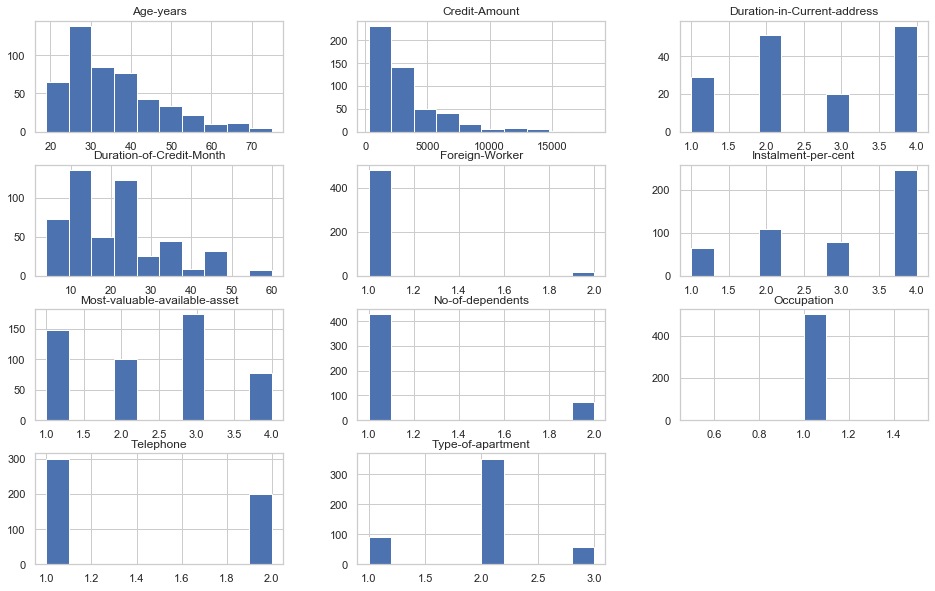

In [6]:
raw_data.hist(column= raw_data.columns,  figsize = (16,10)) # Check the distribution of each columns 

> First, I built  the training set given the data provided. It has 500 datapoints and 20 features. Two features contain missing values. We've also checked the datatypes of each field. I made the following notes to clean the data. 
- (1) All column names include 'dash(-)' between the words. It is replaced with 'underscore' for convenient usage of python.
- (2) The column **"Type-of-apartment"** should have an "object" type, rather than "int64". 
- (3) **'Telephone'** is the contact communication type. It is dropped due to irrelevancy. 
- (4) **'Occupation'**, **'Concurrent-Credits'** have only one value for the entire samples. Although the columns are associated to creditworthiness, it doesn't make sense to be included in the model. 
- (5) The fields: **'Guarantors'**, **'Foreign-Worker'**, **'No-of-dependents'** highly skew towards one type of data. Such low variabilities hinder appropriate prediction. They are dropped.
- (6) **'Duration-in-Current-address'** is removed due the high percentage of missing values. ca. 69% of datapoints are missing. It is dropped.
- (7) **'Age-years'** has only 2% of missing values. I imputed them with the median value. Unlike the mean value, median is the already existing value in the dataset, and it is less susceptible to outliers comparing to mean imputation. I prefer the median here because the distribution of the variable is skewed to the left. And when we have skewed distribution the median value is a more accurate measure of centre.

> Therefore, the initial  data is modified as below. 

In [7]:
# Make a copy of the original dataset. It works as a checkpoint.
data = raw_data.copy() 
# (1) Change the column names with underscore
data.columns = data.columns.str.replace("-", "_")

In [8]:
# (2) Change the datatype of the column: "Type_of_apartment"
data.Type_of_apartment=data.Type_of_apartment.apply(str)

In [9]:
# (3) - (6) Dropped the irrelevant or uncessary columns 
data.drop(['Telephone'], axis = 1, inplace= True) # Irrelevant feature is dropped.
data.drop(['Occupation','Concurrent_Credits'], axis = 1, inplace= True) # Same value for all datapoints are removed.
data.drop(['Guarantors', 'Foreign_Worker','No_of_dependents'], axis = 1, inplace= True) # Columns with low variabilities are excluded.
data.drop(['Duration_in_Current_address'], axis = 1, inplace= True) # The field with huge percentage of missing values is dropped.

In [10]:
# (7) Impute the missing values in Age_years column 
# Find the samples whose 'Age_years' column is omitted.
null_data = data[data.isnull().any(axis=1)]
null_data 

,Credit_Application_Result,Account_Balance,Duration_of_Credit_Month,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Most_valuable_available_asset,Age_years,Type_of_apartment,No_of_Credits_at_this_Bank
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,NaN,2,1
52,Creditworthy,No Account,9,Paid Up,Other,1199,None,1-4 yrs,4,2,NaN,2,More than 1
63,Creditworthy,No Account,9,Paid Up,Other,1549,£100-£1000,< 1yr,4,1,NaN,2,1
115,Creditworthy,Some Balance,12,No Problems (in this bank),Other,930,£100-£1000,4-7 yrs,4,1,NaN,2,More than 1
139,Creditworthy,Some Balance,12,No Problems (in this bank),Other,1402,£100-£1000,1-4 yrs,3,3,NaN,1,1
151,Creditworthy,Some Balance,12,Paid Up,Other,1736,None,1-4 yrs,3,1,NaN,2,1
172,Creditworthy,No Account,12,Paid Up,Other,3017,None,< 1yr,3,1,NaN,1,1
321,Creditworthy,No Account,24,Paid Up,Other,2384,None,4-7 yrs,4,1,NaN,1,1
345,Creditworthy,Some Balance,24,No Problems (in this bank),Other,3617,£100-£1000,4-7 yrs,4,4,NaN,1,More than 1
363,Creditworthy,Some Balance,24,No Problems (in this bank),Other,5103,None,< 1yr,3,4,NaN,3,More than 1


In [11]:
median_age = data['Age_years'].median()
median_age # Calculate the median value of age in years

33.0

In [12]:
# Fill up the missing datapoints with its median values 
values = {'Age_years': median_age} 
data.fillna(value=values, inplace = True); 

> All cleaning processes earlier mentioned, are done. Now, using the methods .head() and .info(), check whether the changes are well applied. 

In [13]:
data.head()

,Credit_Application_Result,Account_Balance,Duration_of_Credit_Month,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Most_valuable_available_asset,Age_years,Type_of_apartment,No_of_Credits_at_this_Bank
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit_Application_Result          500 non-null    object 
 1   Account_Balance                    500 non-null    object 
 2   Duration_of_Credit_Month           500 non-null    int64  
 3   Payment_Status_of_Previous_Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit_Amount                      500 non-null    int64  
 6   Value_Savings_Stocks               500 non-null    object 
 7   Length_of_current_employment       500 non-null    object 
 8   Instalment_per_cent                500 non-null    int64  
 9   Most_valuable_available_asset      500 non-null    int64  
 10  Age_years                          500 non-null    float64
 11  Type_of_apartment                  500 non-null    object 

> Column names are changed with underscores between the words. All fields in the dataset do not contain missing values. Looks Nice. 

<a id='Exploration'></a>
## Data Exploration with Visualizations

> In this section, I explore each column individually deeper. To begin with, I compare the creditworthy customers with the non-creditworthy. Furthermore, for numeric input variables, I analysed their group means, and whether they are statistically significant. Several visualizations will help you to understand whether  the individual fields are associated with the target variables. <br>

> **Contents of the Section**<br>
    <ul>
    <li><a href="#target">1. Credit Application Result (Desired Target)</a></li>
    <li><a href="#correlation">2. Correlation between numeric variables</a></li>
    <li><a href="#balance">3. Account Balance</a></li>
    <li><a href="#status">4. Payment Status of Previous Credit</a></li>
    <li><a href="#purpose">5. Purpose</a></li>
    <li><a href="#value">6. Value Savings Stocks</a></li>
    <li><a href="#length">7. Length of current employment</a></li>
    <li><a href="#apartment">8. Types of Apartment</a></li>
    <li><a href="#no_Credits">9. Number of Credits at this Bank</a></li>
    </ul>

<a id='target'></a>
### 1. Credit Application Result (Desired Target)

In [15]:
data['Credit_Application_Result'].value_counts()

Creditworthy        358
Non-Creditworthy    142
Name: Credit_Application_Result, dtype: int64

Text(0, 0.5, 'Counts')

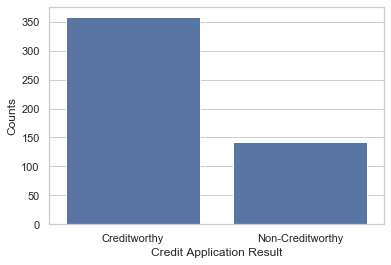

In [16]:
base_color =sns.color_palette()[0]
sns.countplot(x='Credit_Application_Result',data = data, color =base_color)
plt.xlabel('Credit Application Result')
plt.ylabel('Counts')

In [17]:
non_creditworthy = len(data[data['Credit_Application_Result']=='Non-Creditworthy'])
creditworthy = len(data[data['Credit_Application_Result']=='Creditworthy'])
pct_of_non_creditworthy = non_creditworthy/(non_creditworthy+creditworthy)
print("- Proportion of Non-Creditworthy:", pct_of_non_creditworthy)
pct_of_creditworthy = creditworthy/(non_creditworthy+creditworthy)
print("- Proportion of Creditworthy:", pct_of_creditworthy)

- Proportion of Non-Creditworthy: 0.284
- Proportion of Creditworthy: 0.716


> The classes are imbalanced, and the ratio of "Creditworthy" to "Non-Creditworthy" shows is **72:28**. Before I balanced the classes, some more explorations are conducted. I calculated the group means of numeric variables (Duration_of_Credit_Month, Credit_Amount, Instalment_per_cent, Most_valuable_available_asset, Age_years) for both groups and tested whether the group means are statistically different.

#### Group Means Comparisons

In [18]:
# Calcuate the group means.
data.groupby('Credit_Application_Result').mean()

,Duration_of_Credit_Month,Credit_Amount,Instalment_per_cent,Most_valuable_available_asset,Age_years
Credit_Application_Result,,,,,
Creditworthy,19.865922,2840.229050,2.966480,2.265363,35.952514
Non-Creditworthy,25.387324,4106.957746,3.119718,2.598592,34.619718


> - The average credit duration of "Creditworthy" customers are shorter than that of "Non_Creditworthy" customers. The difference is about 5.52 months. 
- The average credit amount of "Creditworthy" individuals are smaller than that of the "Non_Creditworthy". "Non_Creditworthy" customers take USD 1,266.73 more than the Creditworthy on average. 
- The variable "Most_valuable_available_asset" is numeric, but in discrete value. The average number of available assets that creditworthy customers own is ca. 2.27. Similarly. the Non_Creditworthy own ca. 2.60.
- "Age_years" is in the same situation with "Most_valuable_available_asset". The average age of Creditworthy group is a little bit higher than that of Non_Creditworthy group.  
- Since the differences of the two variables seem quite trivial, I test the mean difference using two samples independent t-test below. 

#### Two Sample Independent T-tests

In [19]:
from scipy import stats
data_test=data.copy()
worthy= data_test.query('Credit_Application_Result =="Creditworthy"') # Filter out the creditworthy. 
non_worthy = data_test.query('Credit_Application_Result != "Creditworthy"') # Filter out the non-creditworthy. 

In [20]:
# T-test for "Duration_of_Credit_Month"
stats.ttest_ind(worthy['Duration_of_Credit_Month'],non_worthy['Duration_of_Credit_Month'], equal_var = False)

Ttest_indResult(statistic=-4.347773395109759, pvalue=2.0650349072181e-05)

In [21]:
# T-test for "Credit_Amount"
stats.ttest_ind(worthy['Credit_Amount'],non_worthy['Credit_Amount'], equal_var = False)

Ttest_indResult(statistic=-3.72534707078571, pvalue=0.0002602378463940242)

In [22]:
# T-test for "Instalment_per_cent"
stats.ttest_ind(worthy['Instalment_per_cent'],non_worthy['Instalment_per_cent'], equal_var = False)

Ttest_indResult(statistic=-1.392518904544035, pvalue=0.16495295478821406)

In [23]:
# T-test for "Most_valuable_available_asset"
stats.ttest_ind(worthy['Most_valuable_available_asset'],non_worthy['Most_valuable_available_asset'], equal_var = False)

Ttest_indResult(statistic=-3.1659536259830956, pvalue=0.0017332335688768836)

In [24]:
# T-test for "Age_years"
stats.ttest_ind(worthy['Age_years'],non_worthy['Age_years'], equal_var = False)

Ttest_indResult(statistic=1.1613893683418994, pvalue=0.2465931246944281)

> The T-tests results show that the mean differences for the columns: "Duration_of_Credit_Month", "Credit_Amount", "Most_valuable_available_asset" are statistically significant, with the alpha level 0.05. On the other hand, the average of "Instalment_per_cent", "Age_years" are not significantly different between the two groups. As the next step of data exploration, I checked the correlation between the input variables. 

<a id='correlation'></a>
### 2. Correlation between Numeric Variables

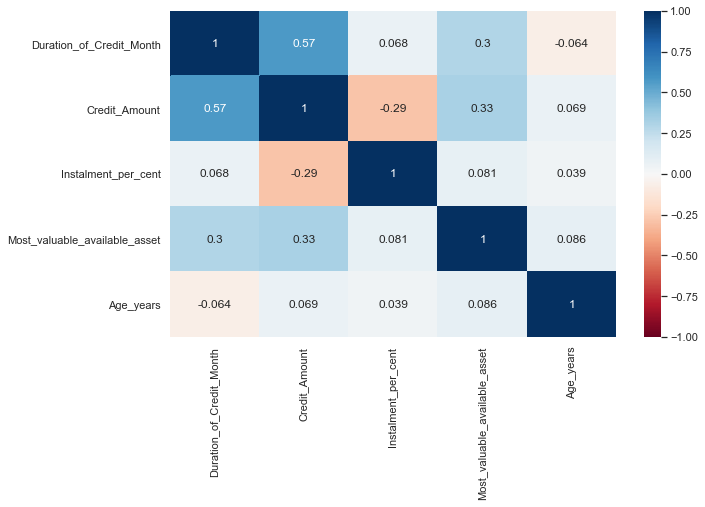

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot = True,cmap="RdBu", center=0, vmin=-1, vmax=1)

> It seems that "Credit Amount" and "Duration of Credit Month" are moderately (but not severely correlated) and positively correlated. [Correlation Reference.](https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/) Other than the two, none of remaining numerical fields have strong correlations (larger than 0.7) each other. <br>
> Next, I calculated group means for other categorical variables in the dataset to get a more detailed sense of our data.

<a id='balance'></a>
### 3. Account Balance

In [26]:
data['Account_Balance'].value_counts()

No Account      262
Some Balance    238
Name: Account_Balance, dtype: int64

In [27]:
data.groupby('Account_Balance').mean()

,Duration_of_Credit_Month,Credit_Amount,Instalment_per_cent,Most_valuable_available_asset,Age_years
Account_Balance,,,,,
No Account,22.618321,3560.492366,2.935115,2.366412,34.770992
Some Balance,20.130252,2803.113445,3.092437,2.352941,36.457983


(array([0, 1]), <a list of 2 Text xticklabel objects>)

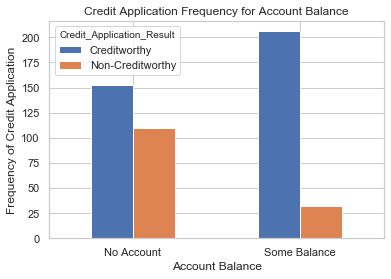

In [28]:
%matplotlib inline
pd.crosstab(data['Account_Balance'],data['Credit_Application_Result']).plot(kind='bar')
plt.title('Credit Application Frequency for Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Frequency of Credit Application')
plt.xticks(rotation =360)

> The frequency of Credit Application Results depends on whether each customer has some balance on this bank. Thus, the column 'Account_Balance' is a good predictor of the outcome variable.

<a id='status'></a>
### 4. Payment Status of Previous Credit

In [29]:
data['Payment_Status_of_Previous_Credit'].value_counts()

Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name: Payment_Status_of_Previous_Credit, dtype: int64

In [30]:
data.groupby('Payment_Status_of_Previous_Credit').mean()

,Duration_of_Credit_Month,Credit_Amount,Instalment_per_cent,Most_valuable_available_asset,Age_years
Payment_Status_of_Previous_Credit,,,,,
No Problems (in this bank),22.088235,3291.720588,3.058824,2.411765,38.147059
Paid Up,20.134615,3004.515385,2.965385,2.257692,33.757692
Some Problems,27.111111,4091.805556,3.055556,2.805556,34.111111


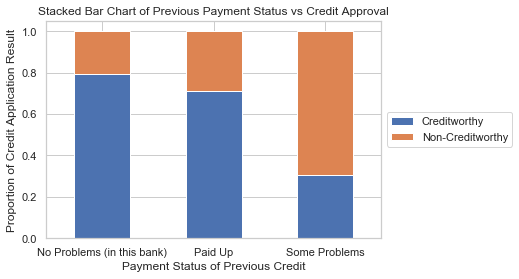

In [31]:
table=pd.crosstab(data['Payment_Status_of_Previous_Credit'],data['Credit_Application_Result'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Previous Payment Status vs Credit Approval')
plt.xlabel('Payment Status of Previous Credit')
plt.ylabel('Proportion of Credit Application Result')
plt.xticks(rotation =360)
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)

> The proportion of Credit Application Results is different whether each credit applicant has some problems or not. The group of people either in 'No Problems (in this bank)' or in 'Paid up' shows little difference. Thus, it would be better that after integrating both groups then it should be used as a predictor of the outcome variable. 

In [32]:
data.Payment_Status_of_Previous_Credit.replace('No Problems (in this bank)', 'No Problems (in this bank) or Paid Up', inplace = True)
data.Payment_Status_of_Previous_Credit.replace('Paid Up', 'No Problems (in this bank) or Paid Up', inplace = True)

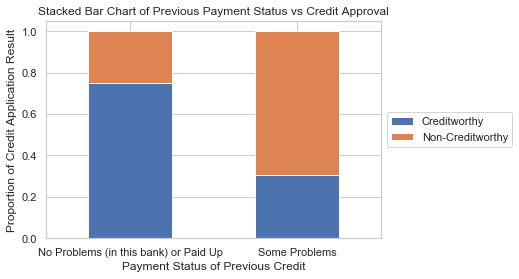

In [33]:
table=pd.crosstab(data['Payment_Status_of_Previous_Credit'],data['Credit_Application_Result'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Previous Payment Status vs Credit Approval')
plt.xlabel('Payment Status of Previous Credit')
plt.ylabel('Proportion of Credit Application Result')
plt.xticks(rotation =360)
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)

<a id='purpose'></a>
### 5. Purpose

In [34]:
data['Purpose'].value_counts()

Home Related    355
Used car         83
New car          47
Other            15
Name: Purpose, dtype: int64

In [35]:
data.groupby('Purpose').mean()

,Duration_of_Credit_Month,Credit_Amount,Instalment_per_cent,Most_valuable_available_asset,Age_years
Purpose,,,,,
Home Related,21.425352,3024.952113,3.090141,2.323944,35.963380
New car,26.191489,5200.255319,2.680851,2.851064,37.936170
Other,20.000000,3271.066667,3.333333,2.066667,34.600000
Used car,19.036145,2803.060241,2.795181,2.289157,32.746988


Text(0, 0.5, 'Frequency of Credit Application')

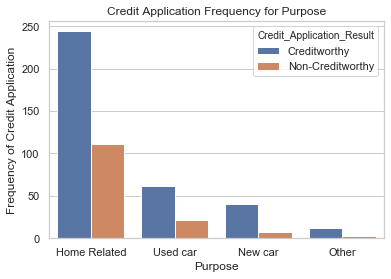

In [36]:
purpose_order=['Home Related', 'Used car','New car', 'Other']
sns.countplot(data = data, x = 'Purpose', hue = 'Credit_Application_Result',order = purpose_order)
plt.title('Credit Application Frequency for Purpose')
plt.xlabel('Purpose')
plt.ylabel('Frequency of Credit Application')

> The frequency of Credit Application Results depends on the purpose of credits. Thus, the column 'Purpose' is a good predictor of the outcome variable.

<a id='value'></a>
### 6. Value Savings Stocks

In [37]:
data['Value_Savings_Stocks'].value_counts()

None          298
£100-£1000    154
< £100         48
Name: Value_Savings_Stocks, dtype: int64

In [38]:
data.groupby('Value_Savings_Stocks').mean()

,Duration_of_Credit_Month,Credit_Amount,Instalment_per_cent,Most_valuable_available_asset,Age_years
Value_Savings_Stocks,,,,,
< £100,23.208333,3272.187500,3.104167,2.729167,33.895833
None,21.265101,3214.137584,2.986577,2.328859,35.338926
£100-£1000,21.207792,3150.077922,3.025974,2.305195,36.551948


In [39]:
data['Value_Savings_Stocks'].unique()

array(['£100-£1000', 'None', '< £100'], dtype=object)

Text(0, 0.5, 'Proportion of Credit Application Results')

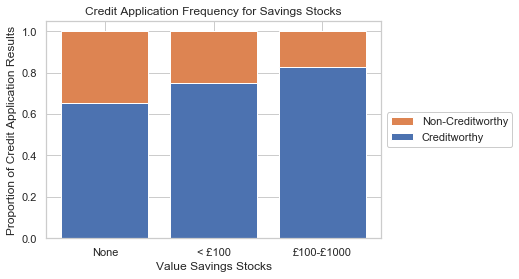

In [40]:
stocks_order = ['None', '< £100', '£100-£1000' ] # The order of Value_Savings_Stocks
credit_order = ['Creditworthy', 'Non-Creditworthy'] # The order of Credit_Application_Result

artists = [] # For storing references to plot elements
baselines = np.zeros(len(stocks_order))
stocks_counts = data['Value_Savings_Stocks'].value_counts()

# For each second-variable category:
for i in range(len(credit_order)):
    # isolate the counts of the first category,
    cat_credit= credit_order[i]
    inner_counts = data[data['Credit_Application_Result'] == cat_credit]['Value_Savings_Stocks'].value_counts()
    inner_props = inner_counts / stocks_counts
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(stocks_order)),
                   height = inner_props[stocks_order],
                   bottom = baselines)
    artists.append(bars)
    baselines += inner_props[stocks_order]

plt.xticks(np.arange(len(stocks_order)), stocks_order)
plt.legend(reversed(artists), reversed(credit_order), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6);

plt.title('Credit Application Frequency for Savings Stocks')
plt.xlabel('Value Savings Stocks')
plt.ylabel('Proportion of Credit Application Results')

> We should note that the column "Value_Savings_Stocks" is a categorical variable, and also the ordinal variable. The proportion of Creditworthy gets increasing as the value of saving stocks larger. The column is a good predictor of the outcome variable. 

<a id='length'></a>
### 7. Length of current employment

In [41]:
data['Length_of_current_employment'].value_counts()

< 1yr      279
4-7 yrs    124
1-4 yrs     97
Name: Length_of_current_employment, dtype: int64

In [42]:
data.groupby('Length_of_current_employment').mean()

,Duration_of_Credit_Month,Credit_Amount,Instalment_per_cent,Most_valuable_available_asset,Age_years
Length_of_current_employment,,,,,
1-4 yrs,21.402062,2835.649485,3.051546,2.402062,32.639175
4-7 yrs,21.669355,3168.129032,3.306452,2.604839,43.000000
< 1yr,21.340502,3340.802867,2.863799,2.236559,33.293907


In [43]:
data['Length_of_current_employment'].unique()

array(['< 1yr', '1-4 yrs', '4-7 yrs'], dtype=object)

Text(0, 0.5, 'Proportion of Credit Application Results')

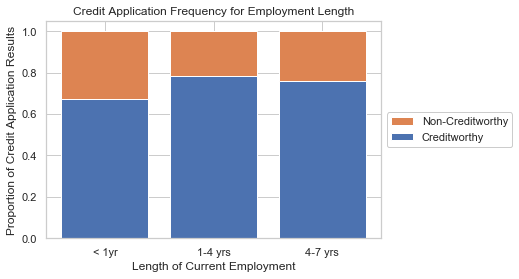

In [44]:
length_order = ['< 1yr', '1-4 yrs', '4-7 yrs'] # The order of Length_of_current_employment
credit_order = ['Creditworthy', 'Non-Creditworthy'] # The order of Credit_Application_Result

artists = [] # for storing references to plot elements
baselines = np.zeros(len(length_order))
length_counts = data['Length_of_current_employment'].value_counts()

# for each second-variable category:
for i in range(len(credit_order)):
    # isolate the counts of the first category,
    credit = credit_order[i]
    inner_counts = data[data['Credit_Application_Result'] == credit]['Length_of_current_employment'].value_counts()
    inner_props = inner_counts / length_counts
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(length_order)),
                   height = inner_props[length_order],
                   bottom = baselines)
    artists.append(bars)
    baselines += inner_props[length_order]

plt.xticks(np.arange(len(length_order)), length_order)
plt.legend(reversed(artists), reversed(credit_order), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6);

plt.title('Credit Application Frequency for Employment Length')
plt.xlabel('Length of Current Employment')
plt.ylabel('Proportion of Credit Application Results')

> The column "Length_of_current_employment" is a categorical variable, and also the ordinal variable. Although any particular tendency can be recognized from the visualizations, we can notice that the percentage of being creditworthy for employment less than 1 year is weigh lower than the customers with longer employment. Thus, it would be better using  the input as a predictor after integrating  both groups (i.e. '1-4 yrs' and '4-7 yrs').

In [45]:
data.Length_of_current_employment.replace('1-4 yrs', 'longer than 1 yrs employment', inplace = True)
data.Length_of_current_employment.replace('4-7 yrs', 'longer than 1 yrs employment', inplace = True)

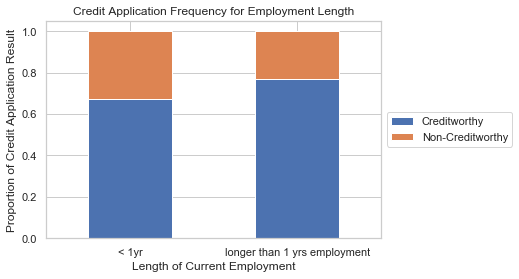

In [46]:
table=pd.crosstab(data['Length_of_current_employment'],data['Credit_Application_Result'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Credit Application Frequency for Employment Length')
plt.xlabel('Length of Current Employment')
plt.ylabel('Proportion of Credit Application Result')
plt.xticks(rotation =360)
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)

<a id='apartment'></a>
### 8. Types of Apartment

In [47]:
data['Type_of_apartment'].value_counts()

2    352
1     92
3     56
Name: Type_of_apartment, dtype: int64

In [48]:
data.groupby('Type_of_apartment').mean()

,Duration_of_Credit_Month,Credit_Amount,Instalment_per_cent,Most_valuable_available_asset,Age_years
Type_of_apartment,,,,,
1,20.293478,3072.934783,2.869565,2.173913,30.434783
2,20.593750,2897.894886,3.019886,2.153409,35.394886
3,28.589286,5307.517857,3.178571,3.964286,45.142857


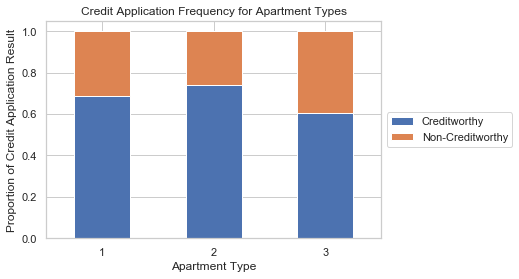

In [49]:
table=pd.crosstab(data['Type_of_apartment'],data['Credit_Application_Result'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Credit Application Frequency for Apartment Types')
plt.xlabel('Apartment Type')
plt.ylabel('Proportion of Credit Application Result')
plt.xticks(rotation =360)
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)

> The detail information about each type of apartment type is unknown. However according to the data, we can speculate that Type3 is more expensive apartment comparing to others. The average credit durations of Type3 is longer, the average credit amount of the type is much larger, and therefore its instalment percentage is higher. Average age of customers whose apartment type is '3' is 10-15 years older than the customers in Apartment Type 2 or 3.

<a id='no_Credits'></a>
### 9. Number of Credits at this Bank

In [50]:
data['No_of_Credits_at_this_Bank'].value_counts()

1              320
More than 1    180
Name: No_of_Credits_at_this_Bank, dtype: int64

In [51]:
data.groupby('No_of_Credits_at_this_Bank').mean()

,Duration_of_Credit_Month,Credit_Amount,Instalment_per_cent,Most_valuable_available_asset,Age_years
No_of_Credits_at_this_Bank,,,,,
1,21.615625,3314.081250,2.962500,2.340625,34.515625
More than 1,21.111111,2997.133333,3.094444,2.394444,37.455556


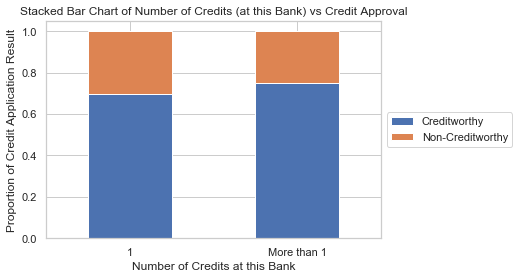

In [52]:
table=pd.crosstab(data['No_of_Credits_at_this_Bank'],data['Credit_Application_Result'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Number of Credits (at this Bank) vs Credit Approval')
plt.xlabel('Number of Credits at this Bank')
plt.ylabel('Proportion of Credit Application Result')
plt.xticks(rotation =360)
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)

> Finally I compare the customers who has only one credit with the customers with more than one credits at this bank. The customers with one credit only take more credit amount on average with lower instalment percentage. On the other hand, customers with more than one credits at this bank are more likely to be determined as creditworthy customers. Their available assets are a little bit higher than the other. This feature is regarded as a good predictor of the target variable.

> So far, we've conducted Data Cleaning and Data Exploration. Based on the cleaned dataset, I will continue the analysis using classification models in Part2. 

In [53]:
data.head()

,Credit_Application_Result,Account_Balance,Duration_of_Credit_Month,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Most_valuable_available_asset,Age_years,Type_of_apartment,No_of_Credits_at_this_Bank
0,Creditworthy,Some Balance,4,No Problems (in this bank) or Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1
1,Creditworthy,Some Balance,4,No Problems (in this bank) or Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,Creditworthy,Some Balance,4,No Problems (in this bank) or Paid Up,Home Related,1544,None,longer than 1 yrs employment,2,1,42.0,2,More than 1
3,Creditworthy,Some Balance,4,No Problems (in this bank) or Paid Up,Home Related,3380,None,longer than 1 yrs employment,1,1,37.0,2,1
4,Creditworthy,No Account,6,No Problems (in this bank) or Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1


In [54]:
data.to_excel('credit-data-training-cleaned.xlsx', index = False)